In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

In [2]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [10]:
train_dir = '/content/Indian-Currency-Classification-main/train'   

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          #train_dir, 
    directory=r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\train",
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(227,227), 
          shuffle=True, 
          seed=123, 
          validation_split=0.2, 
          subset='training',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          directory=r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\train", 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(227,227), 
          shuffle=False, 
          seed=123, 
          validation_split=0.2, 
          subset='validation',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

Found 1239 files belonging to 7 classes.
Using 992 files for training.
Found 1239 files belonging to 7 classes.
Using 247 files for validation.


In [11]:
def normalize(image,label):
    """
    Returns normalized image and its label
    """ 
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [12]:
train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# Convolutional layer 1
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Convolutional layer 2
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Convolutional layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Convolutional layer 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Convolutional layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten layer
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_8 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_9 (Activation)   (None, 27, 27, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                  

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [75]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
    )

In [76]:
model.fit(train_dataset,epochs=10)

Epoch 1/10
31/31 [==============================] - 83s 3s/step - loss: 1.9506 - accuracy: 0.1341
Epoch 2/10
31/31 [==============================] - 76s 2s/step - loss: 1.9514 - accuracy: 0.1280
Epoch 3/10
31/31 [==============================] - 69s 2s/step - loss: 1.9508 - accuracy: 0.1331
Epoch 4/10
31/31 [==============================] - 69s 2s/step - loss: 1.9486 - accuracy: 0.1381
Epoch 5/10
31/31 [==============================] - 67s 2s/step - loss: 1.9499 - accuracy: 0.1391
Epoch 6/10
31/31 [==============================] - 69s 2s/step - loss: 1.9484 - accuracy: 0.1562
Epoch 7/10
31/31 [==============================] - 73s 2s/step - loss: 1.9465 - accuracy: 0.1351
Epoch 8/10
31/31 [==============================] - 72s 2s/step - loss: 1.9481 - accuracy: 0.1220
Epoch 9/10
31/31 [==============================] - 67s 2s/step - loss: 1.9490 - accuracy: 0.1341
Epoch 10/10
31/31 [==============================] - 68s 2s/step - loss: 1.9499 - accuracy: 0.1230


In [77]:
val_loss, val_acc = model.evaluate(validation_dataset)
print(f"Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

8/8 [==============================] - 5s 551ms/step - loss: 1.9084 - accuracy: 0.7166
Validation:
	loss:1.9083586931228638 
	accuracy:0.71659916639328


In [78]:
test_dir = r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\test"

test_imageID = []
# r=root, d=directories, f = files

for r, d, f in os.walk(test_dir, topdown=True):
    for file in f:
      if '.jpg' in file:
          test_imageID.append(Path(file).stem)
test_imageID = sorted(test_imageID)

In [79]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          test_dir, 
          labels=None, 
          label_mode=None,
          class_names = None,
          color_mode='rgb', 
          batch_size=1,
          shuffle = False,
          image_size=(227,227), 
          interpolation='bicubic', 
          smart_resize=True
        )

Found 54 files belonging to 1 classes.


In [80]:
def normalize_test(image):
  """
    Returns normalized image and its label
  """
  image = tf.cast(image/255. ,tf.float32)
  return image

In [81]:
test_dataset = test_dataset.map(normalize_test)

In [82]:
predictions = model.predict(test_dataset)
pred_category = np.argmax(predictions,axis = 1)   


54/54 [==============================] - 3s 48ms/step


In [83]:
labels_name = ['10', '20', '50', '100', '200', '500', '2000']
pred_output_labels = [labels_name[i] for i in pred_category]

In [84]:
test_images = list(test_dataset.as_numpy_iterator()) 
num_test_images = len(test_images)

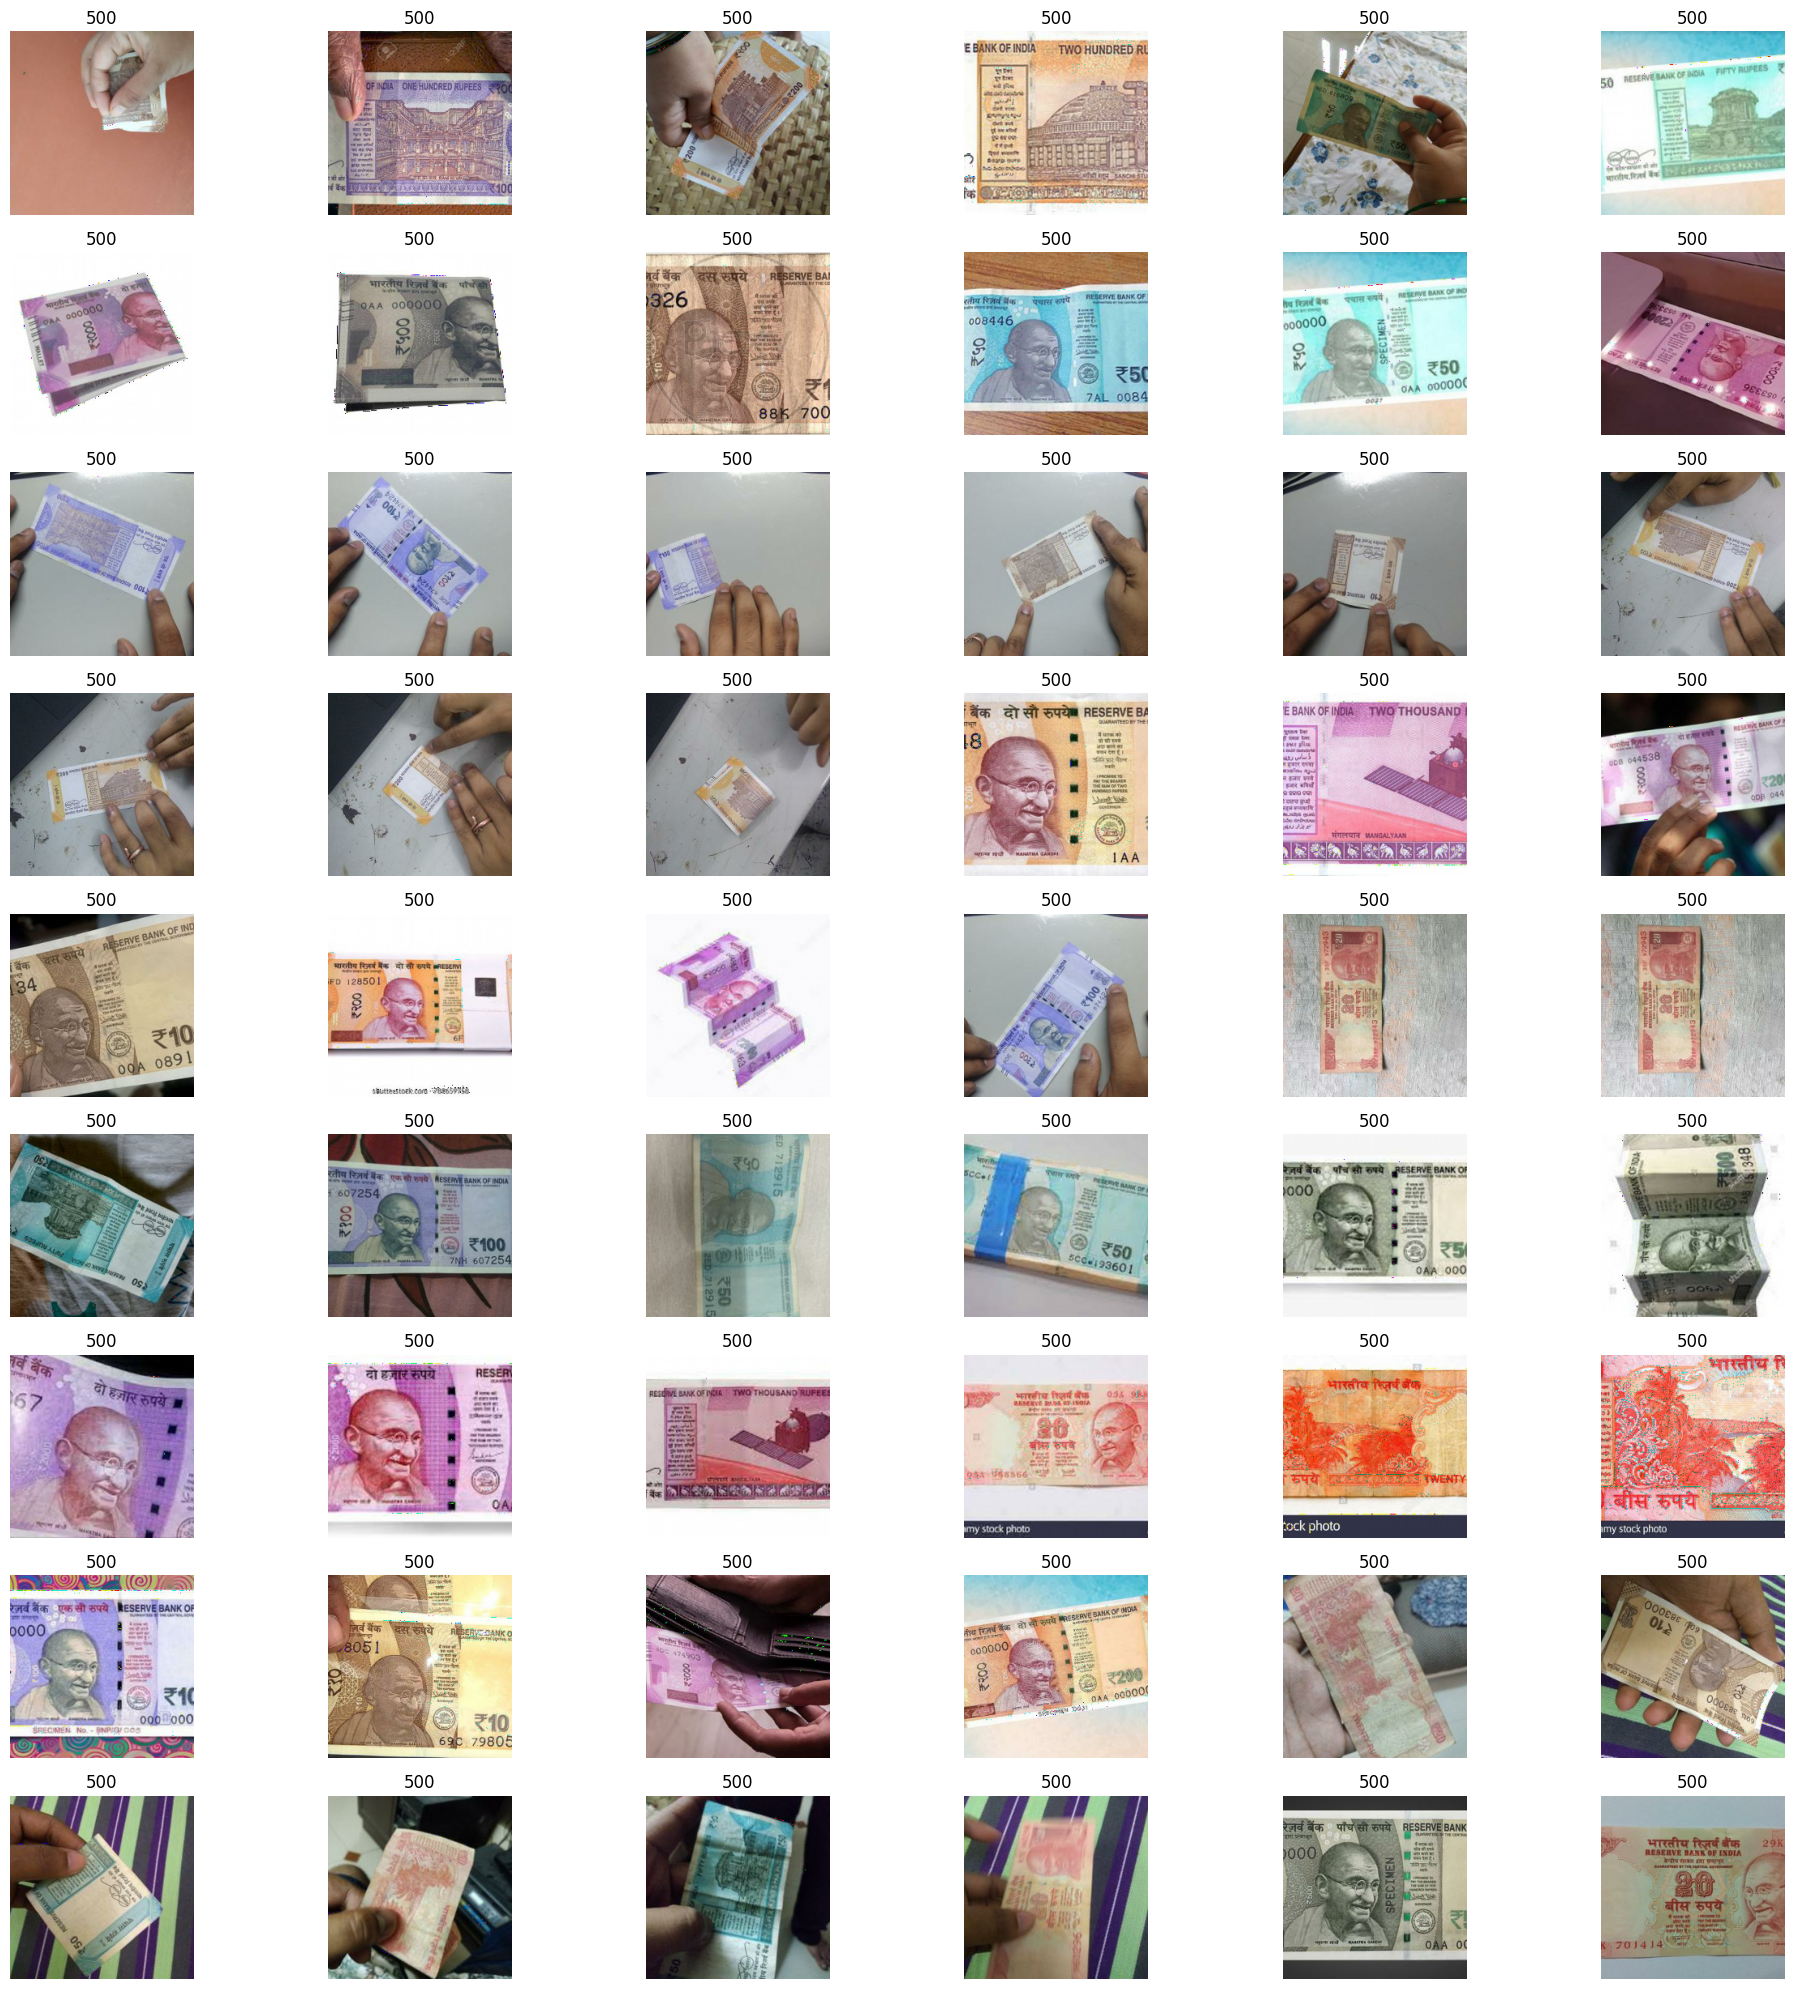

In [85]:
subplot_rows = num_test_images//6 + (1 if num_test_images%6!=0 else 0)
subplot_columns = num_test_images if num_test_images<6 else 6

plt.figure(figsize=(20, 20))
i = 0     

for images in test_images:
  ax = plt.subplot(subplot_rows, subplot_columns, i + 1)
  plt.imshow((np.squeeze(images) * 255).astype(np.uint8), cmap = 'gray')
  plt.title(pred_output_labels[i])
  plt.axis("off")
  i = i + 1

plt.tight_layout()
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 90ms/step


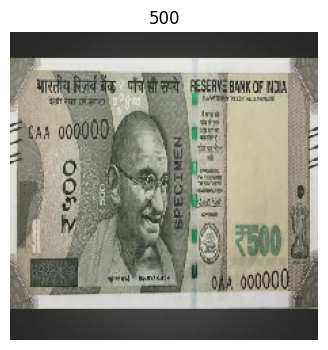

In [87]:
from tensorflow.keras.preprocessing import image
import numpy as np
image_path = "test/thequint_2016-11_71274674-012f-4a31-b1c8-a3ca4cbf4387_new-500-note-currency.jpg"
new_img = image.load_img(image_path, target_size=(227, 227))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = labels_name[index]
#ploting image with predicted class name 
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [50]:
print('hi')

hi
